# Семинар 3. Обучение сверточных нейросетей в Pytorch

На этом семинаре мы будем обучать LeNet-5 на данных MNIST (и не только :). Мы наконец перестанем реализовывать все самостоятельно и будем пользоваться готовым функционалом pytorch.

Для начала ознакомимся с парой примеров обучения модели:
* [Пример 1](https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/convolutional_neural_network/main.py)
* [Пример 2](https://github.com/jcjohnson/pytorch-examples/blob/master/nn/two_layer_net_nn.py)

### Загрузка данных в pytorch

In [203]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

В этот раз мы будем работать MNIST: он отличается от digits разрещением изображений (28x28 вместо 8x8) и числом объектов (60000 в обучении вместо 1797). 

В pytorch есть своя обертка, позволяющая скачивать MNIST, но нам будет удобнее скачать его самостоятельно.

In [31]:
from util import load_mnist

In [206]:
X_train, y_train, X_test, y_test = load_mnist()

Помимо обучающей и контрольной, нам понадобится валидационная выборка, чтобы настраивать гиперпараметры. Ее можно отделить от обучающей выборки (например, 25% = 15000 объектов). Однако модель несколько долго обучается даже на 75% обучающей выборки (несколько минут), что не очень хорошо для семинара. Поэтому для валидационных целей предлагается обучающую выборку также сжать до 15000 объектов. Финальную модель будем обучать по всей выборке.

In [208]:
from sklearn.model_selection import train_test_split

# shuffle data
np.random.seed(0)
idxs = np.random.permutation(np.arange(X_train.shape[0]))
X_train, y_train = X_train[idxs], y_train[idxs]
                            
X_train.shape

(60000, 1, 28, 28)

В pytorch есть удобный класс для генерации батчей - DataLoader. Ему на вход надо подать объект класса TensorDataset, слудащий оберткой над матрицами данных.

In [211]:
def get_loader(X, y, batch_size=64):
    train = torch.utils.data.TensorDataset(torch.from_numpy(X).float(), 
                                       torch.from_numpy(y))
    train_loader = torch.utils.data.DataLoader(train, 
                                               batch_size=batch_size)
    return train_loader

# for final model:
train_loader_full = get_loader(X_train, y_train) 
test_loader = get_loader(X_test, y_test)
# for validation purposes:
train_loader = get_loader(X_train[:15000], y_train[:15000])
val_loader = get_loader(X_train[15000:30000], y_train[15000:30000])

In [213]:
# check number of objects
val_loader.dataset.data_tensor.shape

torch.Size([15000, 1, 28, 28])

### Задание модели LeNet-5

Сверточный слой (из презентации Антона Осокина):
![Слайд про свертки из презентации Антона Осокина](https://github.com/nadiinchi/dl_labs/raw/master/convolution.png)

Нам надо реализовать LeNet-5:

![Архитектура LeNet-5](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/lenet-5-825x285.png?x64257)

Соберите нейросеть в соответствии с изображениями и примерами кода, которые были даны выше. В качестве нелинейности используйте ReLU (после всех сверточных и полносвязных слоев). Кроме того, нейросеть должна поддерживать увеличение числа сверток во всех сверточных слоях в k раз.

In [199]:
class CNN(nn.Module):
    def __init__(self, k=1):
        super(CNN, self).__init__()
        ### your code here: define layers
        

    def forward(self, x):
        ### your code here: transform x using layers
        

Посчитаем параметры нейросети:

In [160]:
cnn = CNN()

In [164]:
def count_parameters(model):
    return sum(param.data.numpy().size for param \
               in model.parameters() if param.requires_grad)

count_parameters(cnn)

44426

### Обучение нейросети

Определим функцию потерь:

In [12]:
criterion = nn.CrossEntropyLoss() # loss includes softmax

Во время обучения модели удобно контролировать качество и на обучении, и на контроле (валидации) - возникает дублирующий код. Поэтому мы вынесем в отдельную функцию оценку модели, и в отдельную функцию - эпоху обучения. Это позволит также честно оценивать значение критерия качества на всей обучающей выборке по окончании эпохи (а не усреднять значения на минибатчах).

В прототипах указано про train и eval mode: в нашем случае они не нужны (были бы нужны, если бы мы использовали дропаут или батч-нормализацию, к примеру). Но чтобы вы могли использовать этот код в будущем, лучше указывать переключение режима.

In [214]:
def train_epoch(model, optimizer, train_loader):
    """
    for each batch 
    performs forward and backward pass and parameters update 
    
    Input:
    model: instance of model (example defined above)
    optimizer: instance of optimizer (defined above)
    train_loader: instance of DataLoader
    
    Returns:
    nothing
    
    Do not forget to set net to train mode!
    """
    ### your code here
    

def evaluate_loss_acc(loader, model):
    """
    Evaluates loss and accuracy on the whole dataset
    
    Input:
    loader:  instance of DataLoader
    model: instance of model (examle defined above)
    
    Do not forget to set net to train mode!
    """
    ### your code here
    
    
def train(model, opt, train_loader, test_loader, n_epochs):
    """
    Performs training of the model and prints progress
    
    Input:
    model: instance of model (example defined above)
    opt: instance of optimizer (defined above)
    train_loader: instance of DataLoader
    test_loader: instance of DataLoader (for evaluation)
    n_epochs: int
    
    Returns:
    4 lists: train_log, train_acc_log, val_log, val_acc_log
    with corresponding metrics per epoch
    """
    train_log, train_acc_log = [], []
    val_log, val_acc_log = [], []

    for epoch in range(n_epochs):
        train_epoch(model, opt, train_loader)
        train_loss, train_acc = evaluate_loss_acc(train_loader, model)
        val_loss, val_acc = evaluate_loss_acc(test_loader, model)

        train_log.append(train_loss)
        train_acc_log.append(train_acc)

        val_log.append(val_loss)
        val_acc_log.append(val_acc)

        print (('Epoch [%d/%d], Loss (train/test): %.4f/%.4f,'+\
               ' Acc (train/test): %.4f/%.4f' )
                   %(epoch+1, n_epochs, \
                     train_loss, val_loss, train_acc, val_acc))
            
    return train_log, train_acc_log, val_log, val_acc_log

Обучите нейронную сеть, используя определенные функции. Установите learning_rate=0.001, число эпох - 20.

In [ ]:
### your code here

Визуализируем результат прохождения изображения через слои. Код ниже отрисовывает сетку изображений: первый столбец - изображения цифр, следующие 6 столбцов - результаты применения фильтров к ним. Чтобы им воспользоваться, сохраните в x переменную, храняющую батч из 10 изображений, в y - результат применения первого лчоя к x.

In [135]:
### your code here


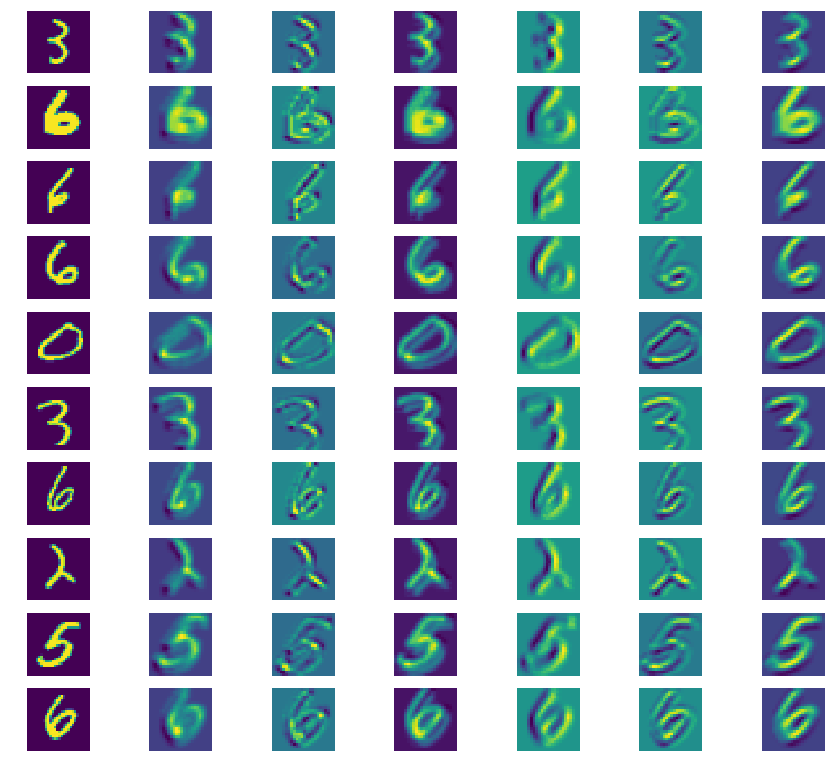

In [147]:
plt.figure(figsize=(15, 15))
for im in range(10):
    plt.subplot(11, 7, im*7+1)
    plt.imshow(x.data[im, 0])
    plt.axis("off")
    for i in range(6):
        plt.subplot(11, 7, im*7+i+2)
        plt.imshow(y.data[im, i].numpy())
        plt.axis("off")

Затем визуализируйте результат применения второго сверточного слоя (после всех предыдущих слоев):

In [216]:
### your code here



### Подбор длины шага и размера батча

Постройте графики точности (accuracy) на обучающей и валидационной выборке в зависимости от номера эпохи при разных параметрах обучения: learning rate$ \in \{0.0001, 0.001, 0.01\}$, batch size $\in \{64, 256\}$. 

Лучше всего отображать кривые для обучения на левом графике, кривые для валидации - на правом с общей осью y (plt.ylim).

Как влияют длина шага и размер батча на итоговое качество?

In [ ]:
### your code here

### Изменение архитектуры

Попробуйте модифицировать архитектуру нейросети: увеличить число фильтров и уменьшить число полносвязных слоев. 

Впишите цифры в скобки:
* LeNet-5 классич. (6 и 16 сверток):  качество на обучении: ( )  качество на валидации: ( )
* Увеличение в 4 раза (24 и 64 сверток):  качество на обучении: ( )  качество на валидации: ( )
* Удаление полносвзяного слоя: предыдущая нейросеть с 1 полносвязным слоем: качество на обучении: ( )  качество на валидации: ( )
    
    

In [ ]:
### your code here

Выберите длину шага, размер батча и архитектуру по валидационной выборке, обучите нейросеть на полной обучающей выборке и выведите качество на контрольной выборке. Хуже ли оно, чем на валидационной выборке?

### Перенесение весов на Fashion MNIST

[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist) - это датасет, аналогичный MNIST, но с изображениями элементов одежды вместо цифр. На нем также предполагается решать задачу классификации на 10 классов. Ясно, что мы можем обучить нейросеть аналогично MNIST. Но интересно исследовать, как "сверточная" часть обученной на MNIST нейросети может быть использована на новых, аналогичных данных. 

Скачайте данные по [ссылке](https://www.kaggle.com/zalando-research/fashionmnist/data) и загрузите с помощью pandas:

In [ ]:
import pandas as pd

In [ ]:
fm_train = pd.read_csv("fashion-mnist_train.csv")
fm_test = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
fm_y_train = fm_train["label"].values
fm_X_train = fm_train[fm_train.columns[1:]].values.reshape(-1, 1, 28, 28)
fm_y_test = fm_test["label"].values
fm_X_test = fm_test[fm_train.columns[1:]].values.reshape(-1, 1, 28, 28)

Выберите любую архитектуру из обученных в предыдущем разделе и попробуйте три способа решения задачи классификации Fashion MNIST:
* обучение нейросети "с нуля";
* обучение всех слоев нейросети, но веса сверточных слоев иниициализируются обученными на MNIST, а полносвязные слои - случайно;
* фиксирование сверточных слоев, обученных на MNIST, и обучение полносвязных слоев.

Велика ли разница в полученном качестве?

In [ ]:
### your code here